In [1]:
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append("../utils")

from ece import generate_conf_df, calculate_weights, calculate_ece

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [3]:
def plot_distribution(conf_df, temp):
    plt.title(f'Temperature = {temp} K')
    plt.xlabel("Conformer")
    plt.ylabel("Boltzmann weight")
    plt.bar(conf_df.conf_num, calculate_weights(conf_df, temp))

In [4]:
conf_df = generate_conf_df('CCNCC', basis='sto-3g', xc='B3LYP')

Checking input file...
	There are 1 SMILES in the input file /var/folders/83/q6p745y53rl_50j5g1hmd6540000gn/T/tmppdh2tv1f/smiles.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
Enumerating cis/tran isomers for unspecified double bonds...
Enumerating R/S isomers for unspecified atomic centers...
Removing enantiomers...
Enumerating conformers/rotamers, removing duplicates...


100%|██████████| 1/1 [00:00<00:00, 45.07it/s]

Preparing for parallel optimizing... (Max optimization steps: 5000)
Total 3D conformers: 6



  7%|▋         | 357/5000 [00:20<04:32, 17.05it/s]

Optimization finished at step 358:   Total 3D structures: 6  Converged: 6   Dropped(Oscillating): 0    Active: 0
Begin to select structures that satisfy the requirements...
Energy unit: Hartree if implicit.


converged SCF energy = -211.177388241006
converged SCF energy = -211.175990404049
converged SCF energy = -211.177281850978
converged SCF energy = -211.17554500051
converged SCF energy = -211.175541423391
converged SCF energy = -211.174291228693


In [5]:
conf_df

,SMILES,conf_num,energy,shannon_entropy
0,CCNCC,0.0,-211.177388,10.447487
1,CCNCC,1.0,-211.175990,10.389876
2,CCNCC,2.0,-211.177282,10.353265
3,CCNCC,3.0,-211.175545,10.300233
4,CCNCC,4.0,-211.175541,10.376058
5,CCNCC,5.0,-211.174291,10.424583


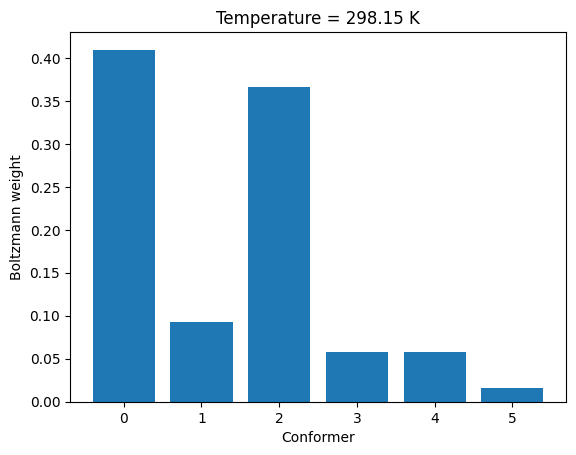

In [6]:
plot_distribution(conf_df, temp=298.15)

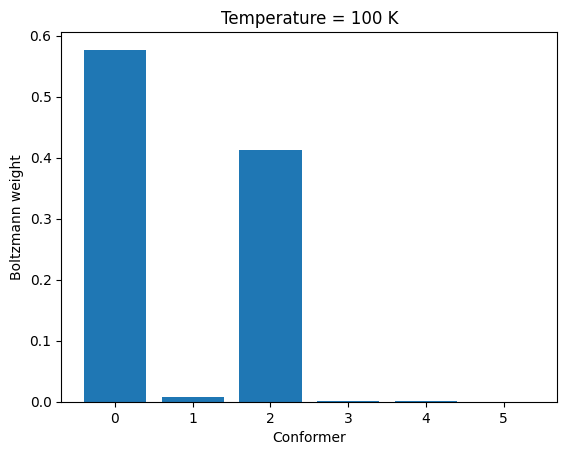

In [7]:
plot_distribution(conf_df, temp=100)

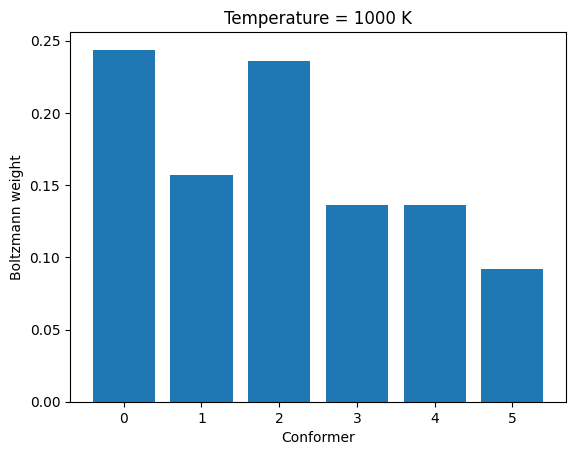

In [8]:
plot_distribution(conf_df, temp=1000)